In [1]:
import numpy as np
import functions as fc
from timeit import default_timer as time
from fatiando.gravmag import polyprism, sphere
from fatiando import mesher, gridder,utils
from fatiando.constants import G, SI2MGAL
from matplotlib import pyplot as plt
from fatiando.vis import mpl
import cPickle as pickle
%matplotlib inline

/home/vanderlei/Documents/fatiando/fatiando/vis/mpl.py:70: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


## Create the model

In [2]:
# Polygonal Prism model
verts1 = [[-500, -3000], [0, -3500], [4500, 0], [4000, 500]]
verts2 = [[4000, -3000], [4500, -2500], [0, 3500], [-500, 3000]]

model_prism = [mesher.PolygonalPrism(verts1, 900., 1500., props={'density':350}),
               mesher.PolygonalPrism(verts2, 1600., 2200., props={'density':400})]
R = 1000 #Radius
xc, yc, zc = -3000.,0.,2000. #Center of sphere
model_sphere = [mesher.Sphere(xc, yc, zc,R, props={'density':-500})]

# Time VS Observation points - Up to 22 500

### Calculate the time necessary to run the Equivalent Layer with Siqueira et al. (2017)

In [3]:
time_old = []
N_time_0 = []
shape_0 = [(10,10),(20,20),(30,30),(40,40),(50, 50),(60,60),(70,70),(80,80),(90,90),(100, 100),(150, 150)]
#shape_0 = [(200, 200)]
for i in range(len(shape_0)):
    print(shape_0[i])
    # Create a regular grid at 0m height
    area = [-5000, 5000, -4000, 4000]
    xi, yi, zi = gridder.regular(area, shape_0[i], z=100.)
    #delta_s  = (area[1]-area[0])/(shape[i][0]-1.)

    # Vertical component of the gravitational atraction observed
    dobs_prism = polyprism.gz(xi, yi, zi, model_prism)
    dobs_sphere = sphere.gz(xi, yi, zi, model_sphere)
    dobs = dobs_sphere + dobs_prism
    dobs = utils.contaminate(dobs, 0.005, seed=0, percent=True)

    zj = np.ones_like(zi)*300

    itmax = 50
    s = time()
    rho, gzp = fc.fast_eq(xi,yi,zi,zj,shape_0[i],dobs,itmax)
    e = time()
    tcpu_0 = e - s
    time_old.append(tcpu_0)
    n_shape_0 = shape_0[i][0]*shape_0[i][1]
    N_time_0.append(n_shape_0)

(10, 10)
(20, 20)
(30, 30)
(40, 40)
(50, 50)
(60, 60)
(70, 70)
(80, 80)
(90, 90)
(100, 100)
(150, 150)


### Calculate the time necessary to run the Equivalent Layer with BTTB method

In [4]:
time_new = []
N_time = []
#shape = [(10,10),(50, 50),(100, 100),(200, 200),(300, 300),(400, 400),(500, 500),(1000, 1000),(1500,1500),(2000, 2000)]
shape = [(10,10),(20,20),(30,30),(40,40),(50, 50),(60,60),(70,70),(80,80),(90,90),(100, 100),(150, 150)]
for i in range(len(shape)):
    print(shape[i])
    # Create a regular grid at 0m height
    area = [-5000, 5000, -4000, 4000]
    xi, yi, zi = gridder.regular(area, shape[i], z=100.)
    #delta_s  = (area[1]-area[0])/(shape[i][0]-1.)

    # Vertical component of the gravitational atraction observed
    dobs_prism = polyprism.gz(xi, yi, zi, model_prism)
    dobs_sphere = sphere.gz(xi, yi, zi, model_sphere)
    dobs = dobs_sphere + dobs_prism
    dobs = utils.contaminate(dobs, 0.005, seed=0, percent=True)

    zj = np.ones_like(zi)*300

    itmax = 50
    s = time()
    rho_c, gzp_bccb = fc.fast_eq_bccb(xi,yi,zi,zj,shape[i],dobs,itmax)
    e = time()
    tcpu = e - s
    time_new.append(tcpu)
    n_shape = shape[i][0]*shape[i][1]
    N_time.append(n_shape)

(10, 10)
(20, 20)
(30, 30)
(40, 40)
(50, 50)
(60, 60)
(70, 70)
(80, 80)
(90, 90)
(100, 100)
(150, 150)


In [5]:
runtime_22500 = dict()
runtime_22500['fast_eql'] = time_old
runtime_22500['bttb'] = time_new
runtime_22500['N'] = N_time

In [6]:
#save the data
file_name = 'runtime_22500.pickle'
with open(file_name, 'w') as f:
    pickle.dump(runtime_22500, f)

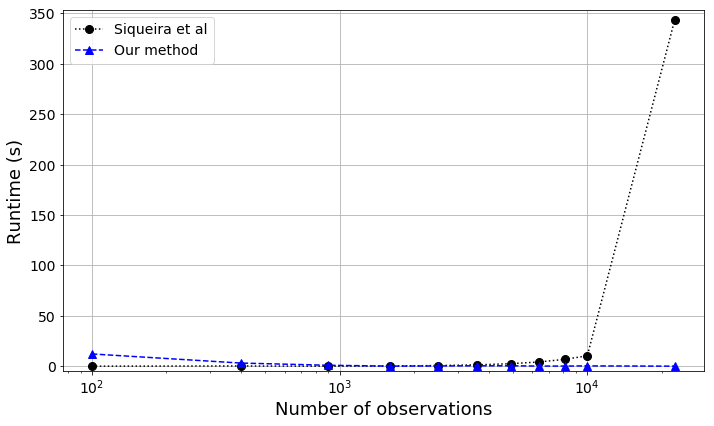

In [7]:
plt.figure(figsize=(10,6))
plt.semilogx(N_time_0, time_old, 'ko:', alpha=1, markersize=8, label='Siqueira et al')
plt.semilogx(N_time, time_new, 'b^--', alpha=1, markersize=8, label='Our method')
#plt.axis('scaled')
#plt.xlim(np.min(N_time)-1,np.max(N_time)+1)
plt.ylim(np.min(time_new)-5,np.max(time_old)+10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of observations', fontsize=18)
plt.ylabel('Runtime (s)', fontsize=18)
plt.grid(True)
plt.tight_layout(True)
plt.legend(loc='upper left', fontsize=14)
#plt.savefig('figures/time_comparison.png', dpi= 500)

# Time VS Observation points - Up to 1 000 000

### Calculate the time necessary to run the Equivalent Layer with BTTB method

In [3]:
# Not necessary to run again, the obtained times are in the cell below

time_new_n = []
N_time_n = []
shape_n = [(10,10),(50, 50),(100, 100),(200, 200),(300, 300),(400, 400),(500, 500),(1000, 1000),(1500,1500),
           (2000, 2000),(3000, 3000),(4000,4000),(5000,5000)]
#shape_n = [(3000, 3000),(4000,4000),(5000,5000)]
for i in range(len(shape_n)):
    print(shape_n[i])
    # Create a regular grid at 0m height
    area = [-5000, 5000, -4000, 4000]
    xi, yi, zi = gridder.regular(area, shape_n[i], z=100.)
    #delta_s  = (area[1]-area[0])/(shape[i][0]-1.)

    # Vertical component of the gravitational atraction observed
    dobs_prism = polyprism.gz(xi, yi, zi, model_prism)
    dobs_sphere = sphere.gz(xi, yi, zi, model_sphere)
    dobs = dobs_sphere + dobs_prism
    dobs = utils.contaminate(dobs, 0.005, seed=0, percent=True)

    zj = np.ones_like(zi)*300

    itmax = 50
    s = time()
    rho_c, gzp_bccb = fc.fast_eq_bccb(xi,yi,zi,zj,shape_n[i],dobs,itmax)
    e = time()
    tcpu_n = e - s
    time_new_n.append(tcpu_n)
    n_shape_n = shape_n[i][0]*shape_n[i][1]
    N_time_n.append(n_shape_n)

(10, 10)
(50, 50)
(100, 100)
(200, 200)
(300, 300)
(400, 400)
(500, 500)
(1000, 1000)
(1500, 1500)
(2000, 2000)
(3000, 3000)
(4000, 4000)
(5000, 5000)


In [4]:
runtime_1M = dict()
runtime_1M['bttb'] = time_new_n
runtime_1M['N'] = N_time_n

In [5]:
#save the data
file_name = 'runtime_1M.pickle'
with open(file_name, 'w') as f:
    pickle.dump(runtime_1M, f)

In [6]:
N_time_n = []
shape_n = [(10,10),(50, 50),(100, 100),(200, 200),(300, 300),(400, 400),(500, 500),(1000, 1000),(1500,1500),
           (2000, 2000),(3000, 3000),(4000,4000),(5000,5000)]

for i in range(len(shape_n)):
    n_shape_n = shape_n[i][0]*shape_n[i][1]
    N_time_n.append(n_shape_n)

time_new_n = [0.011346499999945081, 0.03879659999984142, 0.16005670000004102, 0.9840718999998899, 2.340917100000297,
 4.261215499999707, 6.775052399999822, 30.897041499999887, 72.77239119999967, 132.99228019999964, 315.26829009999983,
 602.1513648999999, 915.180926500000]

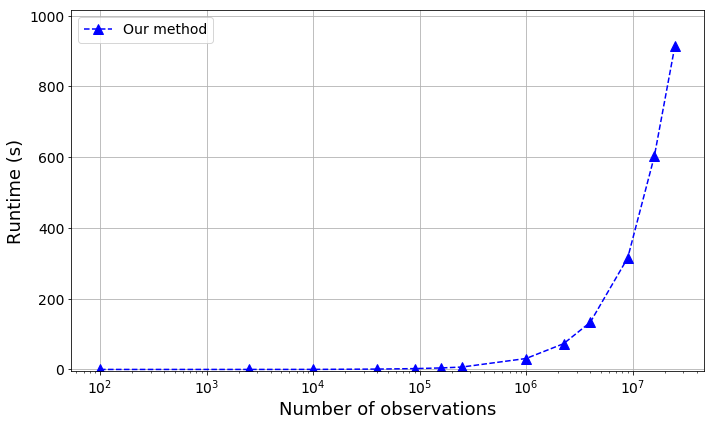

In [7]:
plt.figure(figsize=(10,6))
plt.semilogx(N_time_n, time_new_n, 'b^--', alpha=1, markersize=10, label='Our method')
#plt.axis('scaled')
#plt.xlim(np.min(N_time)-1,np.max(N_time)+1)
plt.ylim(np.min(time_new_n)-5,np.max(time_new_n)+100)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of observations', fontsize=18)
plt.ylabel('Runtime (s)', fontsize=18)
plt.grid(True)
plt.legend(loc='upper left', fontsize=14,)
plt.tight_layout(True)
#plt.savefig('figures/time_bccb.png', dpi= 500)